# Lezione 2

## Dario Pullia

### Esercizio 02.1

Si chiede di valutare l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ attraverso un metodo MC.

Immediatamente applichiamo il metodo della media, ovvero estraiamo in modo uniforme valori di $x \in [0,1)$, valutiamo f(x) e ne calcoliamo la media con il data blocking.

Questa tecnica è efficace ma non efficiente, poichè non tiene in conto che alcune regioni sulle ascisse possono pesare maggiormente di altre all'interno del calcolo della media. Per questo implementiamo anche **l'importance sampling**.

Questa tecnica prevede di estrarre valori di $x \in [0,1)$ con una distribuzione quanto più simile alla funzione da integrare. Tale funzione deve necessariamente:
- Essere normalizzabile
- Essere sempre positiva nell'intevallo

La funzione da valutare diventa $$g(x)=\frac{\pi}{2}\frac{\cos(\pi x/2)}{d(x)} $$ dove d(x) è la nuova distribuzione di probabilità. 

Scegliamo di campionare la funzione con la distribuzione $y=2(1-x)$ con $x \in [0,1)$ perchè migliora l'approssimazione rispetto alla distribuzione rimanendo abbastanza semplice da avere una funzione cumulativa invertibile.
Infatti: 
$$ x=F^{-1}(y)=1-\sqrt{1-y}, y\in [0,1)$$

**Che succede se si estraggono punti con la funzione stessa?** Usualmente non è possibile perchè se si ricorre a tecniche MC significa che l'integrale non è risolvibile in altri modi. Nel nostro caso, al contrario, l'integrale è risolvibile ed è anche semplice invertire la funzione cumulativa. Infatti: 
$$ x=F^{-1}(y)=\sin(\frac{\pi}{2}y), y\in [0,1)$$

Di seguito il confronto tra questi risultati.


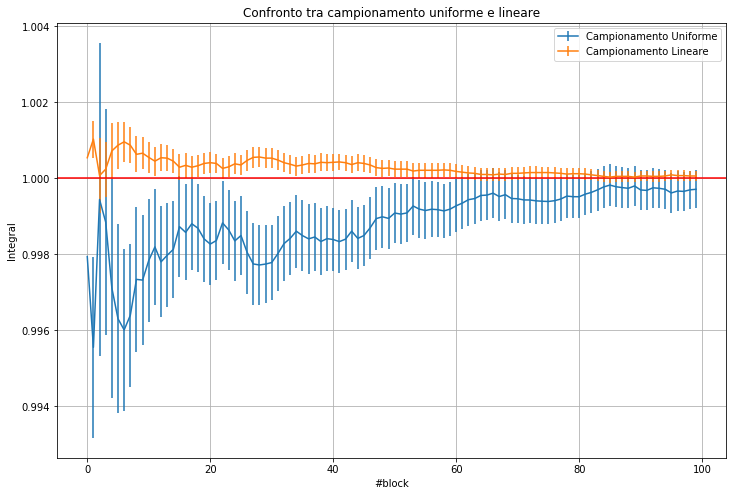

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)


N=100
IntUnif, IntUnifErr, IntLin, IntLinErr,IntCos, IntCosErr  = np.loadtxt("/home/dario/Uni_ubu/lsn/02/data01/data01.dat", usecols=(0,1,2,3,4,5), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,IntUnif, yerr=IntUnifErr, label='Campionamento Uniforme')
plt.errorbar(x,IntLin, yerr=IntLinErr,label='Campionamento Lineare')


plt.title('Confronto tra campionamento uniforme e lineare')
plt.xlabel('#block')
plt.ylabel('Integral')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.grid(True)
plt.legend()
plt.show()





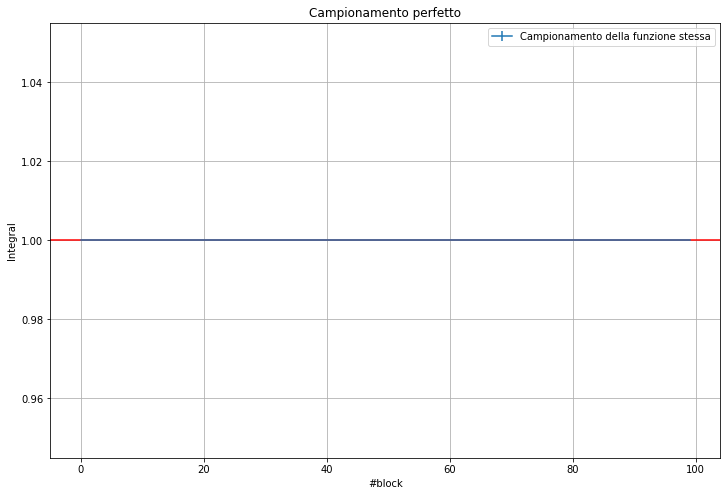

In [7]:
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,IntCos, yerr=IntCosErr, label='Campionamento della funzione stessa')
plt.title('Campionamento perfetto')
plt.xlabel('#block')
plt.ylabel('Integral')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.grid(True)
plt.legend()
plt.show()

Come prevedibile l'integrale calcolato con il campionamento lineare converge più velocemente rispetto al caso di campionamento uniforme. In questo modo si aumenta l'informazione estratta da ogni campionamento, efficientando il processo. Si può osservare l'estremo di questo ragionamento nel caso di '*campionamento perfetto*'. Infatti, quando d(x) è la funzione stessa: $$g(x)=\frac{\pi\cos(\pi x/2)}{2}\frac{2}{\pi\cos(\pi x/2)}=1$$
Per ogni estrazione, la misura vale esattamente il valore dell'integrale. Di conseguenza, la media sarà perfetta con varianza nulla.


### Esercizio 02.2

Studiamo il comportamento del cosiddetto **Random Walk**.

Viene chiamato Random Walk un percorso in cui ad ogni passo viene estratto casualmente la direzione del passo successivo. Studieremo, per 100 passi di lunghezza 1, il caso di un percorso 3D in un reticolo e libero nello spazio. 

Vogliamo vedere **per ogni passo** il valore di $r_{RMS}=\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}$. Pertanto generiamo M=10000 percorsi divisi in N=100 blocchi e facciamo data blocking per ognuno di questi in modo da ottenere media e deviazione standard. Nei grafici seguenti sono rappresentati i valori del centesimo blocco per ogni passo.

#### Implementazione
Per semplificare la programmazione, ho creato una classe "**point**" che contiene al suo interno la coordinata del punto (x,y,z) e un oggetto di tipo random. 
Le funzioni della classe permettono di:
- Richiedere un passo discreto, di fatto aumenta (o diminuisce) di un valore pari al passo scelto una coordinata estratta casualmente
- Richiedere un passo continuo.
- Riportare a zero (x,y,z). Utile per non creare un nuovo punto ogni iterazione.
- Restituire la distanza del punto da (0,0,0).

Come estrarre una direzione casuale su una sfera? Estrarre semplicemente $\theta \in [0,\pi)$ e $\phi \in [0,2\pi)$ purtroppo non risulta corretto perchè favorisce [l'estrazione lungo i poli ](https://mathworld.wolfram.com/SpherePointPicking.html). Scelgo di usare un metodo di rigetto, lo stesso usato per estrarre punti sulla circonferenza dell'esercizio 1.3, che però pecca di efficienza siccome $\frac{V_{sfera}}{V_{cubo}}=0.523598775598$.


Parametro k del fit:  [1.0084299]


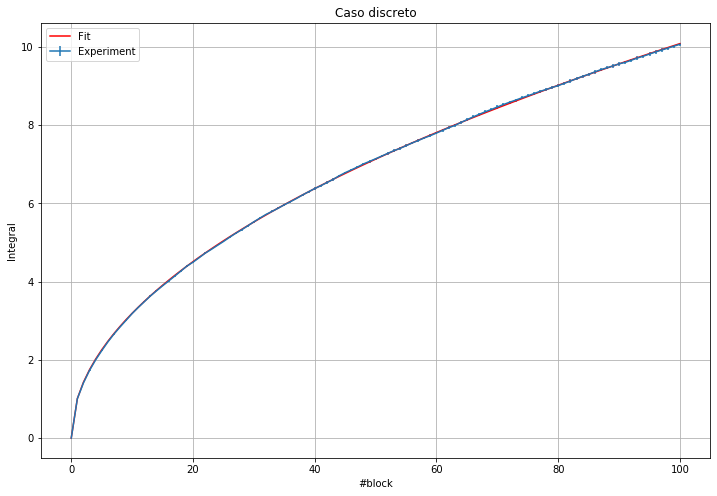

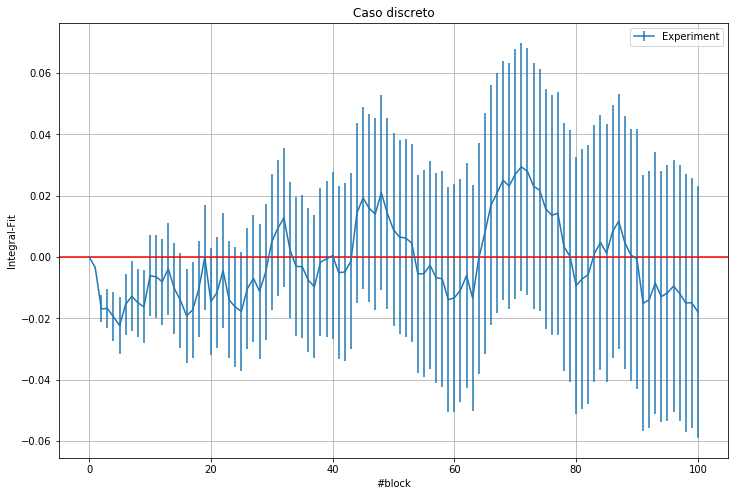

In [44]:
Disc, ErrDisc, Cont, ErrCont= np.loadtxt("/home/dario/Uni_ubu/lsn/02/data02/data02.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
x = np.arange(N+1) 

fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,Disc, yerr=ErrDisc,label="Experiment")
plt.xlabel('#block')
plt.ylabel('Integral')

popt, pcov = curve_fit(f, x, Disc)
print('Parametro k del fit: ', popt)
plt.title('Caso discreto')

plt.plot(x,f(x,*popt), color='red', label='Fit')
plt.grid(True)
plt.legend()
plt.show()
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,Disc-f(x,*popt), yerr=ErrDisc,label="Experiment")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Caso discreto')
plt.xlabel('#block')
plt.ylabel('Integral-Fit')
plt.grid(True)
plt.legend()
plt.show()


Parametro k del fit:  [1.00303763]


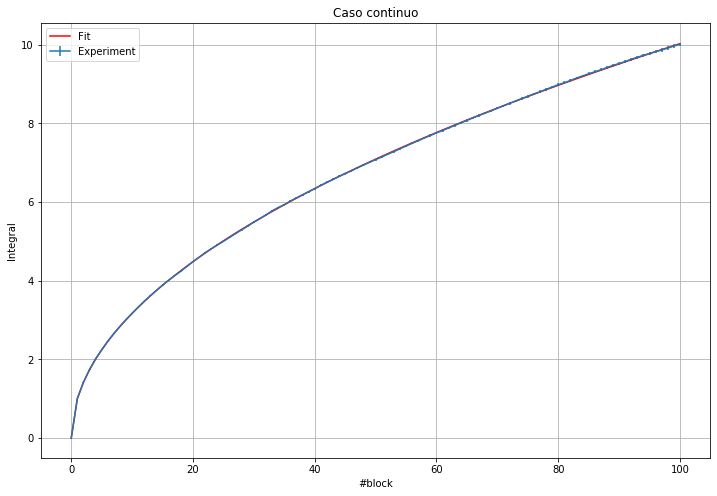

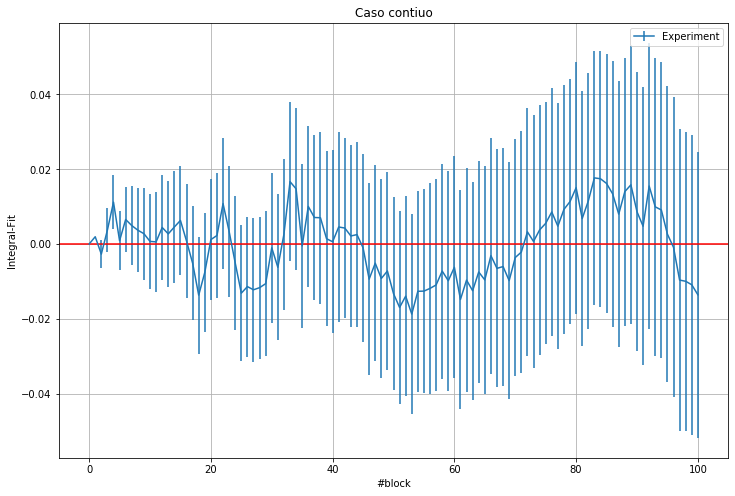

In [46]:
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,Cont, yerr=ErrCont,label="Experiment")

plt.xlabel('#block')
plt.ylabel('Integral')
popt, pcov = curve_fit(f, x, Cont)
print('Parametro k del fit: ', popt)
plt.title('Caso continuo')
plt.plot(x,f(x,*popt), color='red', label='Fit')
plt.legend()
plt.grid(True)
plt.show()
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,Cont-f(x,*popt), yerr=ErrCont,label="Experiment")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Caso contiuo')
plt.xlabel('#block')
plt.ylabel('Integral-Fit')
plt.grid(True)
plt.legend()
plt.show()



Si nota un comportamento diffusivo che *fitta* bene con una funzione $y=k\sqrt(x)$. 